# Clear all outputs before pulling and pushing to avoid much conflicts!

In [1]:
# 2s

import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import plotly.graph_objects as go

connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='4ADhj130!',
    database='jbg030'
)

cursor = connection.cursor()

In [2]:
# 0s

# Function to validate date format
def validate_date(date_str):
    try:
        datetime.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
        return True
    except ValueError:
        return False

while True:
    start_date = input("Please enter the start date (YYYY-MM-DD HH:MM:SS): ")
    if validate_date(start_date):
        break
    else:
        print("Invalid format. Please enter the date in the format YYYY-MM-DD HH:MM:SS")

while True:
    end_date = input("Please enter the end date (YYYY-MM-DD HH:MM:SS): ")
    if validate_date(end_date):
        break
    else:
        print("Invalid format. Please enter the date in the format YYYY-MM-DD HH:MM:SS")

print(f"Start date: {start_date}")
print(f"End date: {end_date}")

Start date: 2019-05-01 00:00:00
End date: 2020-03-31 23:59:59


In [3]:
# 0s

def get_count(query):
    cursor = connection.cursor()
    try:
        for result in cursor.execute(query, multi=True):
            if result.with_rows:
                first_result = result.fetchone()
                cursor.fetchall()  # Ensure all remaining rows are fetched
        return first_result[0] if first_result else 0
    finally:
        cursor.close()

airlines = ['British Aiways', 'KLM', 'Lufthansa', 'Air France']

In [5]:
# Queries for number of conversations where an airline was mentioned per airline- 0s
conv_mentioned_ba = f"""
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%18332190%' OR tweets.mentioned_airlines LIKE '%British_Airways%')
    AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000; 
"""

conv_mentioned_klm = f""" 
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%56377143%' OR tweets.mentioned_airlines LIKE '%KLM%')
    AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000; 
"""

conv_mentioned_lufthansa = f""" 
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%124476322%' OR tweets.mentioned_airlines LIKE '%Lufthansa%')
    AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000; 
"""

conv_mentioned_af = f""" 
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%106062176%' OR tweets.mentioned_airlines LIKE '%AirFrance%')
    AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""

# Queries for number of conversations where an airline was mentioned and the airline replied

conv_replies_mentioned_ba = f"""
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%18332190%' OR tweets.mentioned_airlines LIKE '%British_Airways%')
    AND conversations.airline LIKE '%British_Airways%'
    AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""

conv_replies_mentioned_klm = f""" 
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%56377143%' OR tweets.mentioned_airlines LIKE '%KLM%') 
    AND conversations.airline LIKE '%KLM%'
    AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""

conv_replies_mentioned_lufthansa = f""" 
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%124476322%' OR tweets.mentioned_airlines LIKE '%Lufthansa%') 
    AND conversations.airline LIKE '%Lufthansa%'
    AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""

conv_replies_mentioned_af = f""" 
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%106062176%' OR tweets.mentioned_airlines LIKE '%AirFrance%')
    AND conversations.airline LIKE '%AirFrance%'
    AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
    AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""

# Queries for number of conversations where an airline was mentioned and the airline did not reply

conv_non_replies_where_mentioned_ba = f"""
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%18332190%' OR tweets.mentioned_airlines LIKE '%British_Airways%')
  AND conversations.airline NOT LIKE '%British_Airways%'
  AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
  AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""

conv_non_replies_where_mentioned_klm = f"""
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%56377143%' OR tweets.mentioned_airlines LIKE '%KLM%')
  AND conversations.airline NOT LIKE '%KLM%'
  AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
  AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000; 
"""

conv_non_replies_where_mentioned_lufthansa = f"""
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%124476322%' OR tweets.mentioned_airlines LIKE '%Lufthansa%')
  AND conversations.airline NOT LIKE '%Lufthansa%'
  AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
  AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000; 
"""

conv_non_replies_where_mentioned_af = f"""
SELECT COUNT(DISTINCT conversations.conversation_id)
FROM conversations
JOIN hasher ON hasher.conversation_id = conversations.conversation_id
JOIN tweets ON hasher.id = tweets.id
WHERE (tweets.user_mentions LIKE '%106062176%' OR tweets.mentioned_airlines LIKE '%AirFrance%')
  AND conversations.airline NOT LIKE '%AirFrance%'
  AND conversations.start >= UNIX_TIMESTAMP('{start_date}') * 1000 
  AND conversations.start <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""

In [6]:
# 2m 30s

mentioned_ba_count = get_count(conv_mentioned_ba)
replies_mentioned_ba_count = get_count(conv_replies_mentioned_ba)
non_replies_where_mentioned_ba_count = get_count(conv_non_replies_where_mentioned_ba)

mentioned_klm_count = get_count(conv_mentioned_klm)
replies_mentioned_klm_count = get_count(conv_replies_mentioned_klm)
non_replies_where_mentioned_klm_count = get_count(conv_non_replies_where_mentioned_klm)

mentioned_lufthansa_count = get_count(conv_mentioned_lufthansa)
replies_mentioned_lufthansa_count = get_count(conv_replies_mentioned_lufthansa)
non_replies_where_mentioned_lufthansa_count = get_count(conv_non_replies_where_mentioned_lufthansa)

mentioned_af_count = get_count(conv_mentioned_af)
replies_mentioned_af_count = get_count(conv_replies_mentioned_af)
non_replies_where_mentioned_af_count = get_count(conv_non_replies_where_mentioned_af)

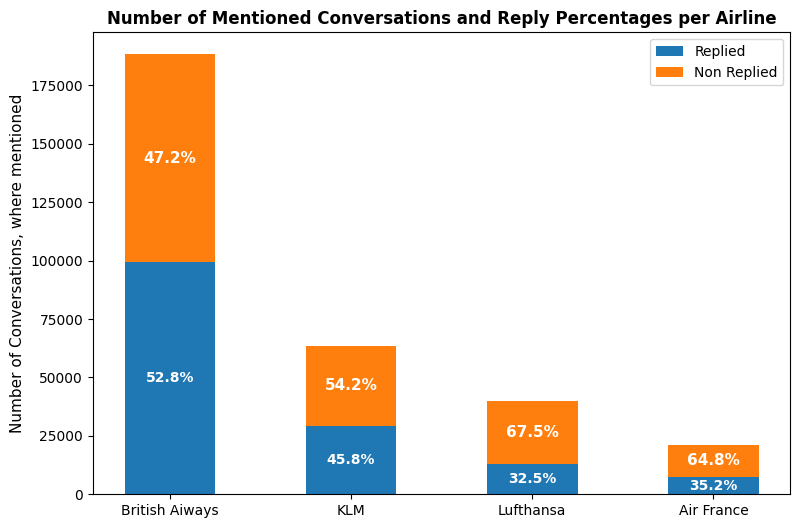

In [7]:
# 0s

replied_percentage_ba = replies_mentioned_ba_count / mentioned_ba_count * 100
non_replied_percentage_ba = non_replies_where_mentioned_ba_count / mentioned_ba_count * 100

replied_percentage_klm = replies_mentioned_klm_count / mentioned_klm_count * 100
non_replied_percentage_klm = non_replies_where_mentioned_klm_count / mentioned_klm_count * 100

replied_percentage_lufthansa = replies_mentioned_lufthansa_count / mentioned_lufthansa_count * 100
non_replied_percentage_lufthansa = non_replies_where_mentioned_lufthansa_count / mentioned_lufthansa_count * 100

replied_percentage_af = replies_mentioned_af_count / mentioned_af_count * 100
non_replied_percentage_af = non_replies_where_mentioned_af_count / mentioned_af_count * 100

mentioned_convs = [mentioned_ba_count, mentioned_klm_count, mentioned_lufthansa_count, mentioned_af_count]
replied_percentages = [replied_percentage_ba, replied_percentage_klm, replied_percentage_lufthansa, replied_percentage_af]
non_replied_percentages = [non_replied_percentage_ba, non_replied_percentage_klm, non_replied_percentage_lufthansa, non_replied_percentage_af]

replied_counts = [replies_mentioned_ba_count, replies_mentioned_klm_count, replies_mentioned_lufthansa_count, replies_mentioned_af_count]
non_replied_counts = [non_replies_where_mentioned_ba_count, non_replies_where_mentioned_klm_count, non_replies_where_mentioned_lufthansa_count, non_replies_where_mentioned_af_count]

bar_width = 0.5
ind = range(len(airlines))

fig, ax = plt.subplots(figsize = (9, 6))

p1 = ax.bar(ind, replied_counts, bar_width, label='Replied')
p2 = ax.bar(ind, non_replied_counts, bar_width, bottom=replied_counts, label='Non Replied')

ax.set_ylabel('Number of Conversations, where mentioned', fontsize= 11)
ax.set_title('Number of Mentioned Conversations and Reply Percentages per Airline', fontsize= 12, weight= 'bold')
ax.set_xticks(ind)
ax.set_xticklabels(airlines)
ax.legend(fontsize=10)

for i in range(len(airlines)):
    ax.text(i, replied_counts[i] / 2, f"{replied_percentages[i]:.1f}%", ha='center', va='center', color='white', weight='bold', fontsize=10)
    ax.text(i, replied_counts[i] + non_replied_counts[i] / 2, f"{non_replied_percentages[i]:.1f}%", ha='center', va='center', color='white', weight='bold', fontsize=11)

plt.show()

In [8]:
# 14s

all_tweets_query = f"""SELECT text, user_id, mentioned_airlines, user_mentions, label, timestamp_ms, baggage, money, staff, delay_and_cancellation
            FROM tweets
            WHERE timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000 
                AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000 
                AND ((
                tweets.mentioned_airlines LIKE '%AirFrance%'
                OR tweets.mentioned_airlines LIKE '%Lufthansa%'
                OR tweets.mentioned_airlines LIKE '%KLM%'
                OR tweets.mentioned_airlines LIKE '%British Airways%'
            )
            OR (
                tweets.user_mentions LIKE '%106062176%'
                OR tweets.user_mentions LIKE '%124476322%'
                OR tweets.user_mentions LIKE '%56377143%'
                OR tweets.user_mentions LIKE '%18332190%'
            ))"""

cursor.execute(all_tweets_query)
texts = cursor.fetchall()
print("Text fetched.")
number_tweets = cursor.rowcount
print("Total number of rows in table: ", number_tweets)

df = pd.DataFrame(texts, columns=['text', 'user_id', 'mentioned_airlines', 'user_mentions', 'label', 'timestamp', 'baggage', 'money', 'staff', 'delay_and_cancellation'])

df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms') 

df['datetime'] = df['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

df['month'] = df['datetime'].dt.month

Text fetched.
Total number of rows in table:  632268


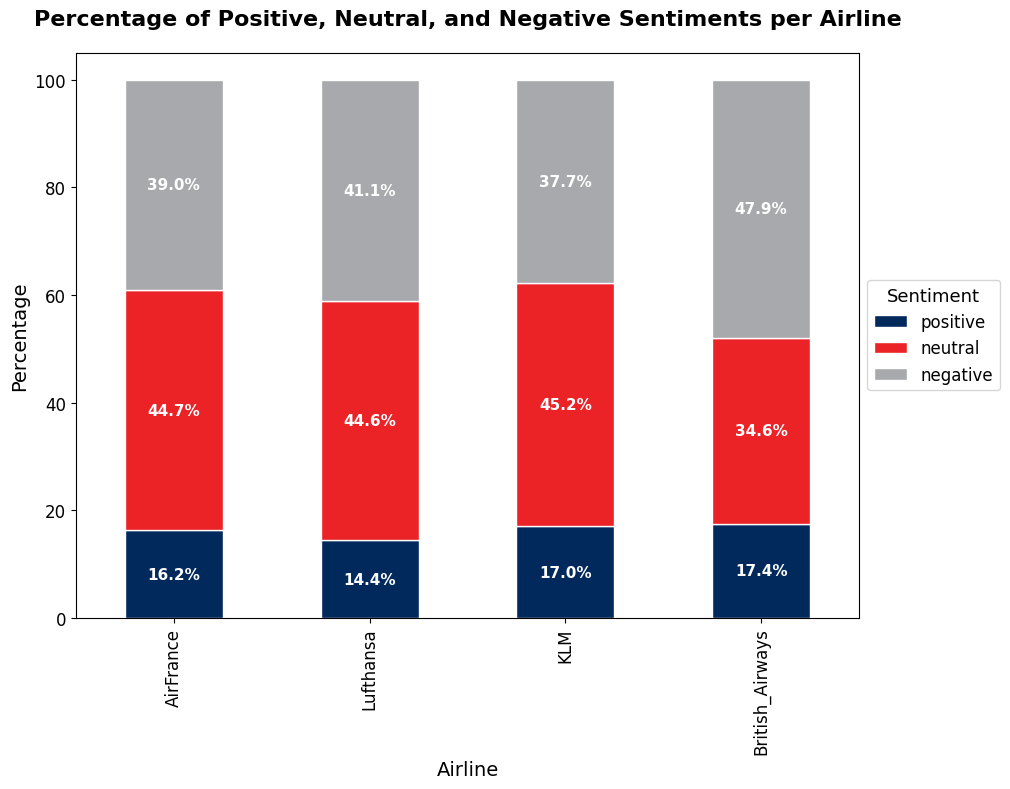

In [10]:
# Percentage of Positive, Neutral, and Negative Sentiments per Airline- 2s

df['AirFrance'] = df['mentioned_airlines'].apply(lambda x: 'AirFrance' in x) | df['user_mentions'].apply(lambda x: '106062176' in x)
df['Lufthansa'] = df['mentioned_airlines'].apply(lambda x: 'Lufthansa' in x) | df['user_mentions'].apply(lambda x: '124476322' in x)
df['KLM'] = df['mentioned_airlines'].apply(lambda x: 'KLM' in x) | df['user_mentions'].apply(lambda x: '56377143' in x)
df['British_Airways'] = df['mentioned_airlines'].apply(lambda x: 'British_Airways' in x) | df['user_mentions'].apply(lambda x: '18332190' in x)

airlines_2 = ['AirFrance', 'Lufthansa', 'KLM', 'British_Airways']
sentiments = ['positive', 'neutral', 'negative']

data = []
for airline in airlines_2:
    sentiment_counts = []
    for sentiment in sentiments:
        count = df[df[airline] & (df['label'] == sentiment)].shape[0]
        sentiment_counts.append(count)
    total = sum(sentiment_counts)
    percentages = [(count / total) * 100 if total > 0 else 0 for count in sentiment_counts]
    data.append(percentages)

plot_df = pd.DataFrame(data, columns=sentiments, index=airlines_2)

fig, ax = plt.subplots(figsize=(12, 8))

# Create the stacked bar plot
custom_colors = ['#01295C', '#EB2226', '#A7A9AC', '#B9CFED']

plot_df.plot(kind='bar', stacked=True, color=custom_colors, ax=ax, edgecolor='white')

for i, airline in enumerate(airlines_2):
    pos_base = 0
    neu_base = plot_df.loc[airline, 'positive']
    neg_base = plot_df.loc[airline, 'positive'] + plot_df.loc[airline, 'neutral']
    for sentiment in sentiments:
        count = plot_df.loc[airline, sentiment]
        percentage = f"{count:.1f}%"
        if sentiment == 'positive':
            ax.text(i, pos_base + count / 2, percentage, ha='center', va='center', fontsize=11, weight='bold', color='white')
            pos_base += count
        elif sentiment == 'neutral':
            ax.text(i, neu_base + count / 2, percentage, ha='center', va='center', fontsize=11, weight='bold', color='white')
            neu_base += count
        else:
            ax.text(i, neg_base + count / 2, percentage, ha='center', va='center', fontsize=11, weight='bold', color='white')
            neg_base += count

            
ax.set_ylabel('Percentage', fontsize=14)
ax.set_xlabel('Airline', fontsize=14)
ax.set_title('Percentage of Positive, Neutral, and Negative Sentiments per Airline', fontsize=16, weight='bold', pad=20)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(title='Sentiment', fontsize=12, title_fontsize='13', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [11]:
# Creates the Dataframe for British Airways- 17 s

conv_ba1 = f"""
    SELECT text, id, staff, baggage, delay_and_cancellation, money, timestamp_ms
    FROM tweets 
    WHERE mentioned_airlines LIKE '%British_Airways%'
        AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
        AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000;   
"""
conv_ba2 = """
    SELECT tweets.text, tweets.id, tweets.staff, tweets.baggage, tweets.delay_and_cancellation, tweets.money, tweets.timestamp_ms
    FROM tweets 
    JOIN hasher ON tweets.id = hasher.id
    JOIN conversations ON hasher.conversation_id = conversations.conversation_id
    WHERE conversations.conversation_id IN (
        SELECT conversation_id
        FROM conversations
        WHERE airline LIKE '%British_Airways%'
            AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
            AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
    ); 
"""

df_ba1 = pd.read_sql(conv_ba1, connection)
df_ba2 = pd.read_sql(conv_ba2, connection)

df_ba = pd.concat([df_ba1, df_ba2], ignore_index=True, axis=0)
df_ba = df_ba.drop_duplicates()

df_ba['datetime'] = pd.to_datetime(df_ba['timestamp_ms'], unit='ms')

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_38022/549450961.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ba1 = pd.read_sql(conv_ba1, connection)
/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_38022/549450961.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ba2 = pd.read_sql(conv_ba2, connection)


In [12]:
# Creates the dataframe for AirFrance- 6s

conv_af1 = f"""
    SELECT text, id, staff, baggage, delay_and_cancellation, money, timestamp_ms
    FROM tweets 
    WHERE mentioned_airlines LIKE '%AirFrance%'
        AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
        AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000;
"""
conv_af2 = f"""
    SELECT tweets.text, tweets.id, tweets.staff, tweets.baggage, tweets.delay_and_cancellation, tweets.money, tweets.timestamp_ms
    FROM tweets 
    JOIN hasher ON tweets.id = hasher.id
    JOIN conversations ON hasher.conversation_id = conversations.conversation_id
    WHERE conversations.conversation_id IN (
        SELECT conversation_id
        FROM conversations
        WHERE airline LIKE '%AirFrance%'
            AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
            AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000   
    );
"""

df_af1 = pd.read_sql(conv_af1, connection)
df_af2 = pd.read_sql(conv_af2, connection)

df_af = pd.concat([df_af1, df_af2], ignore_index=True, axis=0)
df_af = df_af.drop_duplicates()

df_af['datetime'] = pd.to_datetime(df_af['timestamp_ms'], unit='ms')

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_38022/1428863750.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_af1 = pd.read_sql(conv_af1, connection)
/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_38022/1428863750.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_af2 = pd.read_sql(conv_af2, connection)


In [13]:
# Creates the dataframe for KLM- 7s

conv_klm1 = f"""
    SELECT text, id, staff, baggage, delay_and_cancellation, money, timestamp_ms
    FROM tweets 
    WHERE mentioned_airlines LIKE '%KLM%'
        AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
        AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000; 
"""
conv_klm2 = f"""
    SELECT tweets.text, tweets.id, tweets.staff, tweets.baggage, tweets.delay_and_cancellation, tweets.money, tweets.timestamp_ms
    FROM tweets 
    JOIN hasher ON tweets.id = hasher.id
    JOIN conversations ON hasher.conversation_id = conversations.conversation_id
    WHERE conversations.conversation_id IN (
        SELECT conversation_id
        FROM conversations
        WHERE airline LIKE '%KLM%'
            AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
            AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
    );
"""

df_klm1 = pd.read_sql(conv_klm1, connection)
df_klm2 = pd.read_sql(conv_klm2, connection)

df_klm = pd.concat([df_klm1, df_klm2], ignore_index=True, axis=0)
df_klm = df_klm.drop_duplicates()

df_klm['datetime'] = pd.to_datetime(df_klm['timestamp_ms'], unit='ms')

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_38022/2903821447.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_klm1 = pd.read_sql(conv_klm1, connection)
/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_38022/2903821447.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_klm2 = pd.read_sql(conv_klm2, connection)


In [14]:
# Creates the dataframe for Lufthansa- 7s

conv_lh1 = f"""
    SELECT text, id, staff, baggage, delay_and_cancellation, money, timestamp_ms
    FROM tweets 
    WHERE mentioned_airlines LIKE '%Lufthansa%'
       AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
       AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000; 
"""
conv_lh2 = f"""
    SELECT tweets.text, tweets.id, tweets.staff, tweets.baggage, tweets.delay_and_cancellation, tweets.money, tweets.timestamp_ms
    FROM tweets 
    JOIN hasher ON tweets.id = hasher.id
    JOIN conversations ON hasher.conversation_id = conversations.conversation_id
    WHERE conversations.conversation_id IN (
        SELECT conversation_id
        FROM conversations
        WHERE airline LIKE '%Lufthansa%'
            AND timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
            AND timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
    );
"""

df_lh1 = pd.read_sql(conv_lh1, connection)
df_lh2 = pd.read_sql(conv_lh2, connection)

df_lh = pd.concat([df_lh1, df_lh2], ignore_index=True, axis=0)
df_lh = df_lh.drop_duplicates()

df_lh['datetime'] = pd.to_datetime(df_lh['timestamp_ms'], unit='ms')

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_38022/3401460410.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_lh1 = pd.read_sql(conv_lh1, connection)
/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_38022/3401460410.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_lh2 = pd.read_sql(conv_lh2, connection)


In [15]:
# 0s

columns_drop = ['text', 'id', 'timestamp_ms', 'datetime']

df_topics_ba = df_ba.drop(columns=columns_drop)
df_topics_af = df_af.drop(columns=columns_drop)
df_topics_klm = df_klm.drop(columns=columns_drop)
df_topics_lh = df_lh.drop(columns=columns_drop)

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_38022/4002035344.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Staff': [percentages_ba[0], percentages_af[0], percentages_klm[0], percentages_lh[0]],
/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_38022/4002035344.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Baggage': [percentages_ba[1], percentages_af[1], percentages_klm[1], percentages_lh[1]],
/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_38022/4002035344.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer 

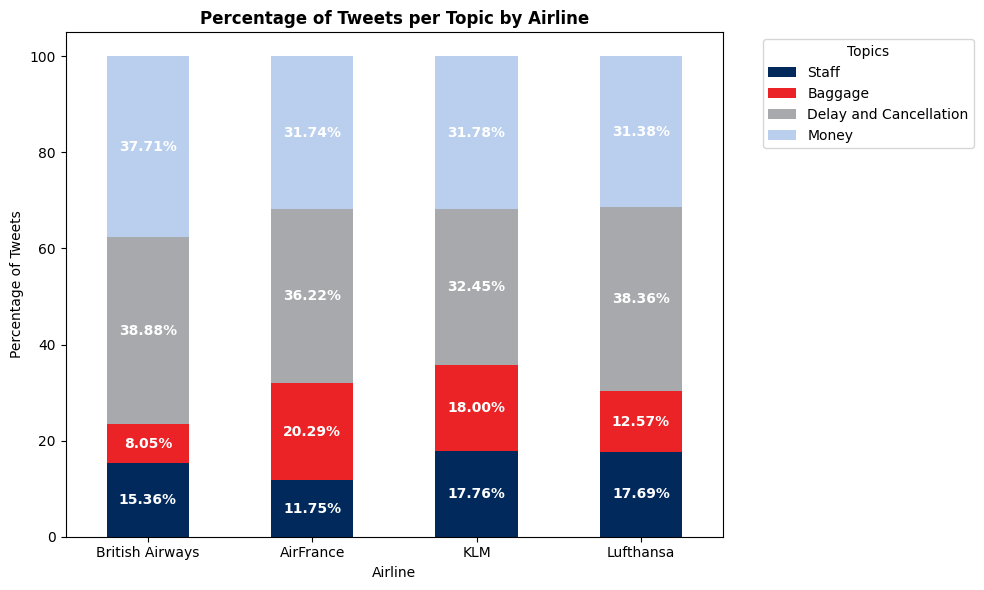

In [16]:
# 0s

counts_ba = df_topics_ba.apply(lambda col: col.value_counts().get(1, 0))
counts_af = df_topics_af.apply(lambda col: col.value_counts().get(1, 0))
counts_klm = df_topics_klm.apply(lambda col: col.value_counts().get(1, 0))
counts_lh = df_topics_lh.apply(lambda col: col.value_counts().get(1, 0))

counts_ba_sum = counts_ba.sum()
counts_af_sum = counts_af.sum()
counts_klm_sum = counts_klm.sum()
counts_lh_sum = counts_lh.sum()

percentages_ba = round((counts_ba / counts_ba_sum) * 100, 2)
percentages_af = round((counts_af / counts_af_sum) * 100, 2)
percentages_klm = round((counts_klm / counts_klm_sum) * 100, 2)
percentages_lh = round((counts_lh / counts_lh_sum) * 100, 2)

percentages = pd.DataFrame({
    'Airline': ['British Airways', 'AirFrance', 'KLM', 'Lufthansa'],
    'Staff': [percentages_ba[0], percentages_af[0], percentages_klm[0], percentages_lh[0]],
    'Baggage': [percentages_ba[1], percentages_af[1], percentages_klm[1], percentages_lh[1]],
    'Delay and Cancellation': [percentages_ba[2], percentages_af[2], percentages_klm[2], percentages_lh[2]],
    'Money': [percentages_ba[3], percentages_af[3], percentages_klm[3], percentages_lh[3]]
})

ax =percentages.set_index('Airline').plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color ='white', weight='bold')

plt.xlabel('Airline')
plt.ylabel('Percentage of Tweets')
plt.title('Percentage of Tweets per Topic by Airline', weight='bold')
plt.xticks(rotation=0)
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


plt.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_38022/3667725256.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([category.capitalize().replace('_', ' ') for category in categories])


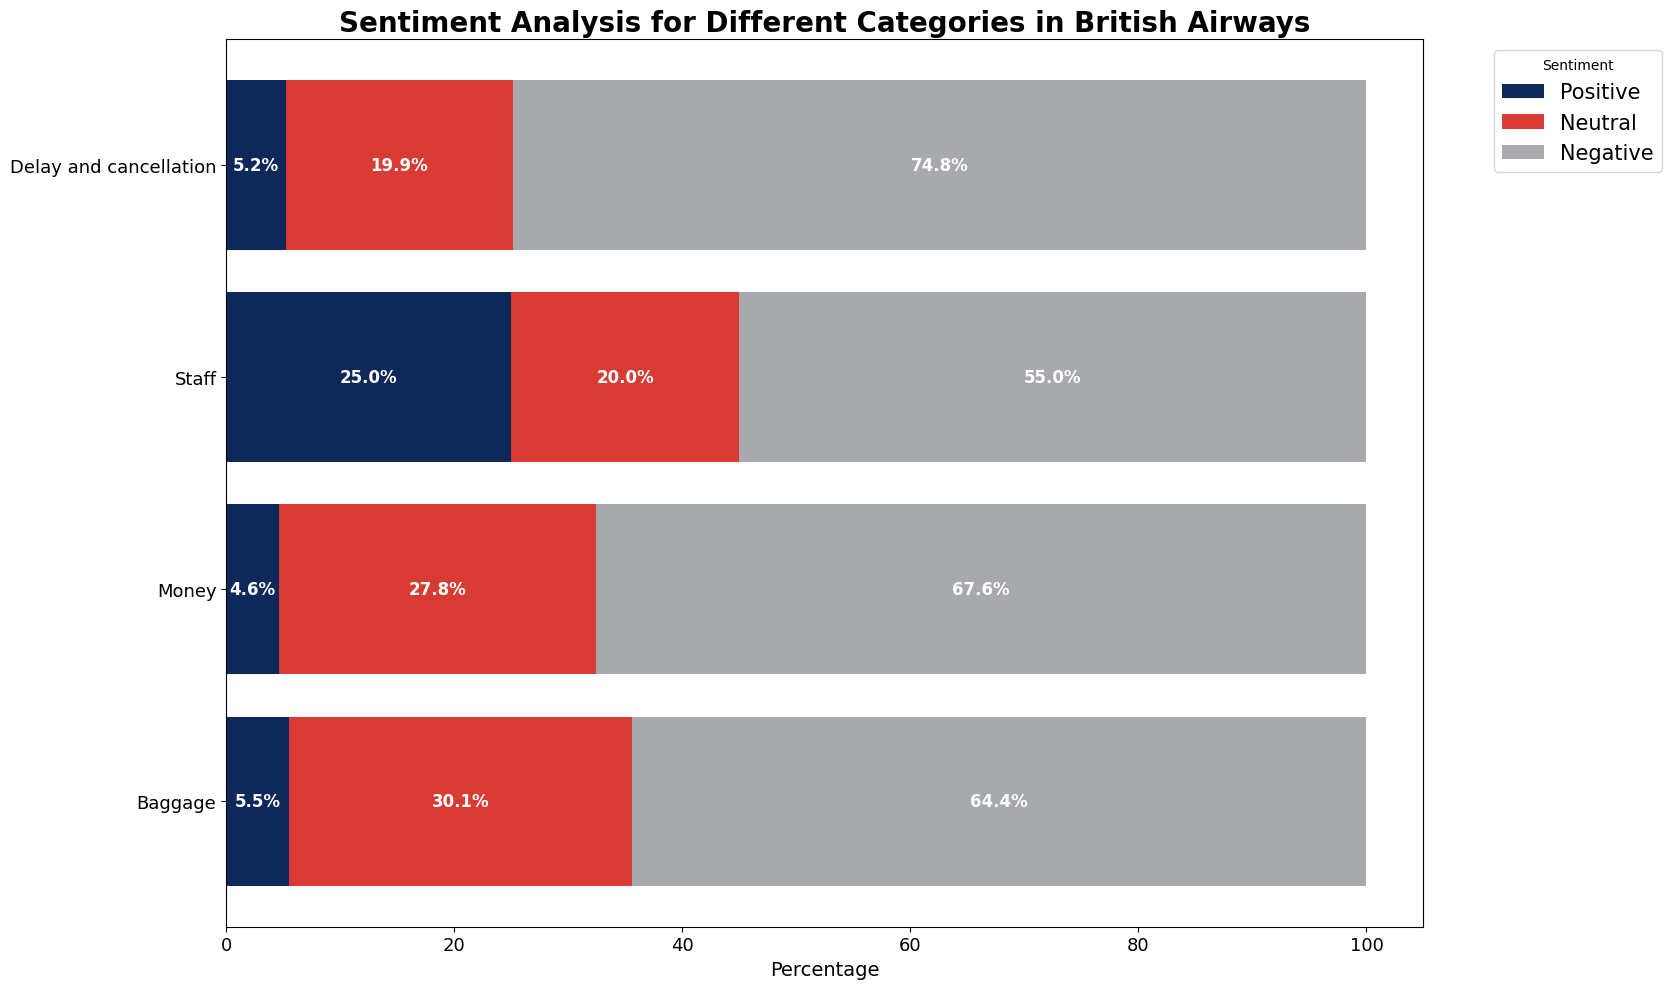

In [18]:
df_ba = df[df['mentioned_airlines'].apply(lambda x: 'British_Airways' in x) | df['user_mentions'].apply(lambda x: '18332190' in x)]

categories = ['baggage', 'money', 'staff', 'delay_and_cancellation']
sentiments = ['positive', 'neutral', 'negative']
sentiment_colors = sns.color_palette("muted", 3)

# Calculate sentiment percentages for each category
sentiment_percentages = {category: [] for category in categories}
total_counts = {category: 0 for category in categories}

for category in categories:
    category_data = df_ba[df_ba[category] == 1]
    total_count = category_data.shape[0]
    total_counts[category] = total_count
    for sentiment in sentiments:
        sentiment_count = category_data[category_data['label'] == sentiment].shape[0]
        sentiment_percentage = (sentiment_count / total_count) * 100 if total_count > 0 else 0
        sentiment_percentages[category].append(sentiment_percentage)

# Custom color palette
custom_colors = ['#0D2859', '#D83B33', '#A7A9AC']

# Prepare the DataFrame for plotting
plot_data = pd.DataFrame(sentiment_percentages, index=sentiments).T

# Plot the horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(20, 10))
bottoms = [0] * len(categories)

for sentiment, color in zip(sentiments, custom_colors):
    ax.barh(categories, plot_data[sentiment], left=bottoms, label=sentiment.capitalize(), color=color)
    bottoms = [i + j for i, j in zip(bottoms, plot_data[sentiment])]

    # Annotate percentages on the bars
    for i, (percent, total) in enumerate(zip(plot_data[sentiment], total_counts.values())):
        if total > 0:
            ax.text(bottoms[i] - percent / 2, i, f'{percent:.1f}%', va='center', ha='center', fontsize=12, color='white', weight='bold')

ax.set_xlabel('Percentage', fontsize=14)
ax.set_title('Sentiment Analysis for Different Categories in British Airways', fontsize=20, weight='bold')
ax.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 15})
ax.set_yticklabels([category.capitalize().replace('_', ' ') for category in categories])
ax.tick_params(axis='both', which='major', labelsize=13)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [24]:
# Define the airline user ID
airline_user_id = 18332190

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_delay = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%British_Airways%' 
    AND tweets.delay_and_cancellation = 1
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_british_airways_sankey_delay = pd.read_sql(query_sankey_delay, connection)

# Convert the datetime column to pandas datetime
df_tweets_british_airways_sankey_delay['datetime'] = pd.to_datetime(df_tweets_british_airways_sankey_delay['timestamp_ms'], unit='ms')

df_tweets_british_airways_sankey_delay['datetime'] = df_tweets_british_airways_sankey_delay['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_delay= df_tweets_british_airways_sankey_delay.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_delay:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != airline_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == airline_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (British Airways, delay and cancellation)", 
    font_size=12,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_38022/2574758610.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [37]:
# Define the airline user ID
airline_user_id = 18332190

# Define the query to get all tweets in the conversations involving British Airways
query_sankey_ba_general = f"""
SELECT tweets.text, tweets.label, tweets.user_id, tweets.timestamp_ms, hasher.conversation_id, hasher.conversation_rank
FROM tweets
JOIN hasher ON hasher.id = tweets.id
JOIN conversations ON hasher.conversation_id = conversations.conversation_id
WHERE conversations.airline LIKE '%British_Airways%' 
    AND tweets.timestamp_ms >= UNIX_TIMESTAMP('{start_date}') * 1000
    AND tweets.timestamp_ms <= UNIX_TIMESTAMP('{end_date}') * 1000
ORDER BY tweets.timestamp_ms;
"""

# Load the result of the query into a DataFrame
df_tweets_british_airways_sankey = pd.read_sql(query_sankey_ba_general, connection)

# Convert the datetime column to pandas datetime
df_tweets_british_airways_sankey['datetime'] = pd.to_datetime(df_tweets_british_airways_sankey['timestamp_ms'], unit='ms')

df_tweets_british_airways_sankey['datetime'] = df_tweets_british_airways_sankey['datetime'].dt.tz_localize('UTC').dt.tz_convert('Europe/Amsterdam')

# Initialize empty lists to store sentiments
sentiments_initial_tweet = []
sentiments_post_reply = []

# Group tweets by conversation_id
grouped_sankey_ba = df_tweets_british_airways_sankey.groupby('conversation_id')

# Process each conversation
for conversation_id, group in grouped_sankey_ba:
    # Identify the initial user's tweet (rank 1)
    user_initial_tweet = group[(group['user_id'] != airline_user_id) & (group['conversation_rank'] == 1)]
    
    if not user_initial_tweet.empty:
        user_id = user_initial_tweet['user_id'].iloc[0]
        initial_tweet_time = user_initial_tweet['datetime'].iloc[0]

        # Identify the airline's reply to this initial tweet
        airline_reply = group[(group['user_id'] == airline_user_id) & (group['datetime'] > initial_tweet_time)]
        if not airline_reply.empty:
            airline_reply_time = airline_reply['datetime'].iloc[0]

            # Identify the user's reply to the airline's response
            user_followup_tweet = group[(group['user_id'] == user_id) & (group['datetime'] > airline_reply_time)]
            if not user_followup_tweet.empty:
                # Append sentiments for analysis
                sentiments_initial_tweet.append(user_initial_tweet['label'].iloc[0])
                sentiments_post_reply.append(user_followup_tweet['label'].iloc[0])

# Step 1: Prepare data for Sankey diagram
transitions = pd.DataFrame({
    'initial': sentiments_initial_tweet,
    'post_reply': sentiments_post_reply
})

# Count transitions
transition_counts = transitions.value_counts().reset_index(name='count')

# Add percentage to transition_counts
total_counts = transition_counts['count'].sum()
transition_counts['percentage'] = (transition_counts['count'] / total_counts * 100).round(2)

# Define nodes (initial sentiments and final grouped sentiments)
nodes = ['positive', 'negative', 'neutral', 'positive_end', 'negative_end', 'neutral_end']
node_indices = {label: i for i, label in enumerate(nodes)}

# Prepare data for Sankey diagram
source = [node_indices[row['initial']] for _, row in transition_counts.iterrows()]
target = [node_indices[f"{row['post_reply']}_end"] for _, row in transition_counts.iterrows()]
value = transition_counts['count'].tolist()
label = [f"{row['initial']} to {row['post_reply']}: {row['count']} ({row['percentage']}%)" for _, row in transition_counts.iterrows()]

# Define colors for nodes and links
node_colors = {
    'positive': 'rgb(44, 160, 44)',  # green
    'negative': 'rgb(214, 39, 40)',  # red
    'neutral': 'rgb(255, 165, 0)',   # orange
    'positive_end': 'rgb(44, 160, 44)',  # green for final positive
    'negative_end': 'rgb(214, 39, 40)',  # red for final negative
    'neutral_end': 'rgb(255, 165, 0)'    # orange for final neutral
}

transition_colors = {
    'positive': 'rgba(44, 160, 44, 0.4)',  # light green
    'negative': 'rgba(214, 39, 40, 0.4)',  # light red
    'neutral': 'rgba(255, 165, 0, 0.4)'    # light orange
}

# Create color list for nodes
colors = [node_colors[node] for node in nodes]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=['Positive', 'Negative', 'Neutral', 'Positive End', 'Negative End', 'Neutral End'],
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[transition_colors[row['initial']] for _, row in transition_counts.iterrows()],  # Use bland colors for transitions
        customdata=label,
        hovertemplate='%{customdata}<extra></extra>',
        label=label  # Add labels directly to the links
    )
)])

fig.update_layout(
    title_text="Sentiment Transition (British Airways)", 
    font_size=18,
    width=1200,  # increased width to accommodate the legend
    height=700,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjusted margins
)

fig.show()

/var/folders/_1/64lzdpgn2472v4xdvl_3y1l40000gn/T/ipykernel_38022/1252912072.py:17: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

